<a href="https://colab.research.google.com/github/mhd998/Fashion_Captioning/blob/master/Ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#reading the dataset
import pandas as pd
df=pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df11=pd.read_csv('heart.csv')
df11.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [5]:
df[['Cholesterol']] = scaler.fit_transform(df[['Cholesterol']])
df[['RestingBP']] = scaler.fit_transform(df[['RestingBP']])
df[['MaxHR']] = scaler.fit_transform(df[['MaxHR']])
df[['Oldpeak']] = scaler.fit_transform(df[['Oldpeak']])
df[['Age']] = scaler.fit_transform(df[['Age']])


In [6]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [7]:
df[['Sex']]=le.fit_transform(df[['Sex']])
df[['ExerciseAngina']]=le.fit_transform(df[['ExerciseAngina']])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,1,ATA,0.70,0.479270,0,Normal,0.788732,0,0.295455,Up,0
1,0.428571,0,NAP,0.80,0.298507,0,Normal,0.676056,0,0.409091,Flat,1
2,0.183673,1,ATA,0.65,0.469320,0,ST,0.267606,0,0.295455,Up,0
3,0.408163,0,ASY,0.69,0.354892,0,Normal,0.338028,1,0.465909,Flat,1
4,0.530612,1,NAP,0.75,0.323383,0,Normal,0.436620,0,0.295455,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,1,TA,0.55,0.437811,0,Normal,0.507042,0,0.431818,Flat,1
914,0.816327,1,ASY,0.72,0.320066,1,Normal,0.570423,0,0.681818,Flat,1
915,0.591837,1,ASY,0.65,0.217247,0,Normal,0.387324,1,0.431818,Flat,1
916,0.591837,0,ATA,0.65,0.391376,0,LVH,0.802817,0,0.295455,Flat,1


In [9]:
x=df[['Age','Sex','RestingBP','Cholesterol','FastingBS','MaxHR','ExerciseAngina','Oldpeak']]
x.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak
0,0.244898,1,0.70,0.479270,0,0.788732,0,0.295455
1,0.428571,0,0.80,0.298507,0,0.676056,0,0.409091
2,0.183673,1,0.65,0.469320,0,0.267606,0,0.295455
3,0.408163,0,0.69,0.354892,0,0.338028,1,0.465909
4,0.530612,1,0.75,0.323383,0,0.436620,0,0.295455


In [10]:
y=df['HeartDisease']
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,train_size=0.80)

In [12]:
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,precision_recall_curve, roc_curve
import seaborn as sea

In [13]:
#Supervised learning_SVM
from sklearn.svm import SVC
clf = SVC(kernel = 'rbf', gamma = 1.5,C = 2,max_iter=1000).fit(x_train, y_train)
print('Training Score:',clf.score(x_train,y_train))
print('Testing Score:',clf.score(x_test,y_test))

Training Score: 0.837874659400545
Testing Score: 0.8043478260869565


              precision    recall  f1-score   support

           0       0.72      0.84      0.78        75
           1       0.88      0.78      0.83       109

    accuracy                           0.80       184
   macro avg       0.80      0.81      0.80       184
weighted avg       0.81      0.80      0.81       184



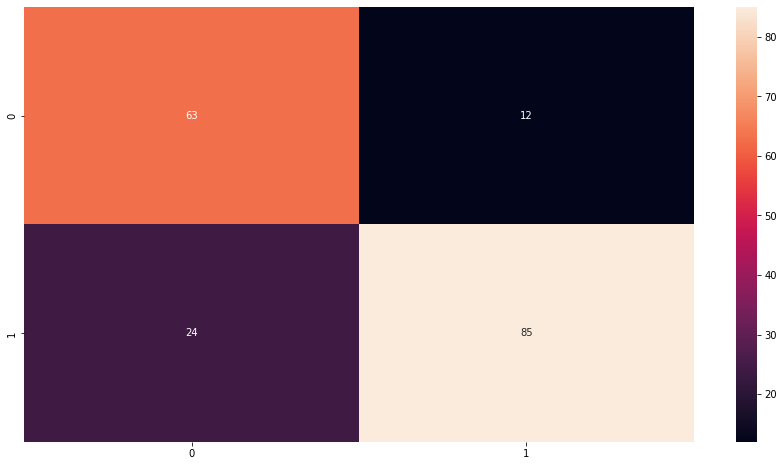

In [14]:
y_pred=clf.predict(x_test)
print(classification_report(y_test,y_pred))
confusion_mc = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(confusion_mc)
plt.figure(figsize=(15,8))
sea.heatmap(df_cm, annot=True)
plt.ylabe='True label'
plt.xlabel='Predicted label'

In [15]:
clf = SVC(kernel = 'rbf', gamma = 1.5,C = 20,max_iter=1000).fit(x_train, y_train)
print('Training Score:',clf.score(x_train,y_train))
print('Testing Score:',clf.score(x_test,y_test))

Training Score: 0.8678474114441417
Testing Score: 0.8260869565217391


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


              precision    recall  f1-score   support

           0       0.75      0.87      0.80        75
           1       0.90      0.80      0.84       109

    accuracy                           0.83       184
   macro avg       0.82      0.83      0.82       184
weighted avg       0.84      0.83      0.83       184



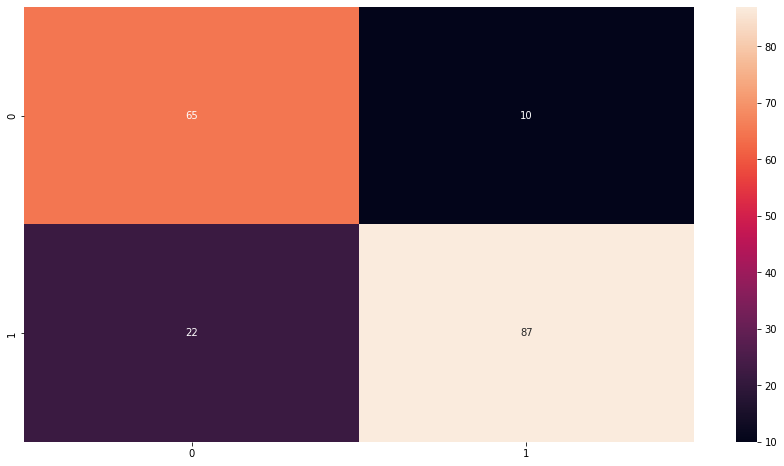

In [16]:
y_pred=clf.predict(x_test)
print(classification_report(y_test,y_pred))
confusion_mc = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(confusion_mc)
plt.figure(figsize=(15,8))
sea.heatmap(df_cm, annot=True)
plt.ylabe='True label'
plt.xlabel='Predicted label'

In [17]:
#even the accuracy get better after modifying c
#but percision, recall stay the same and the FN,FP stayed the same

In [18]:
clf = SVC(kernel = 'rbf', gamma = 100,C = 2,max_iter=1000).fit(x_train, y_train)
print('Training Score:',clf.score(x_train,y_train))
print('Testing Score:',clf.score(x_test,y_test))

Training Score: 0.9904632152588556
Testing Score: 0.7391304347826086


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


              precision    recall  f1-score   support

           0       0.70      0.64      0.67        75
           1       0.77      0.81      0.79       109

    accuracy                           0.74       184
   macro avg       0.73      0.72      0.73       184
weighted avg       0.74      0.74      0.74       184



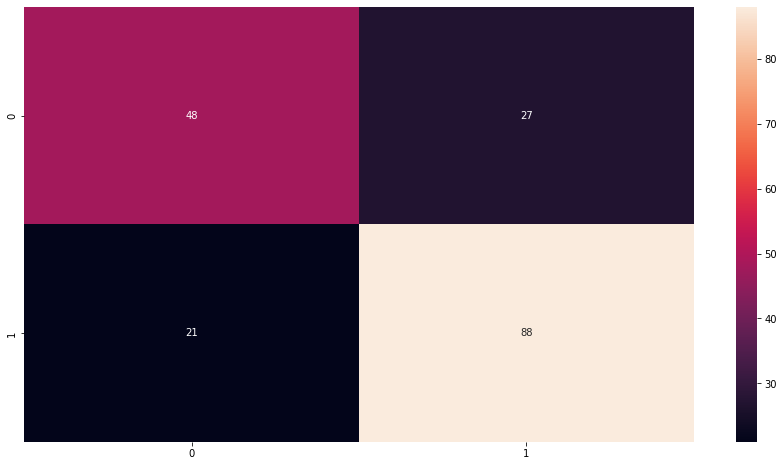

In [19]:
y_pred=clf.predict(x_test)
print(classification_report(y_test,y_pred))
confusion_mc = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(confusion_mc)
plt.figure(figsize=(15,8))
sea.heatmap(df_cm, annot=True)
plt.ylabe='True label'
plt.xlabel='Predicted label'

In [20]:
clf = SVC(kernel = 'rbf', gamma = 0.0005,C = 2,max_iter=1000).fit(x_train, y_train)
print('Training Score:',clf.score(x_train,y_train))
print('Testing Score:',clf.score(x_test,y_test))

Training Score: 0.5435967302452316
Testing Score: 0.592391304347826


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        75
           1       0.59      1.00      0.74       109

    accuracy                           0.59       184
   macro avg       0.30      0.50      0.37       184
weighted avg       0.35      0.59      0.44       184



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


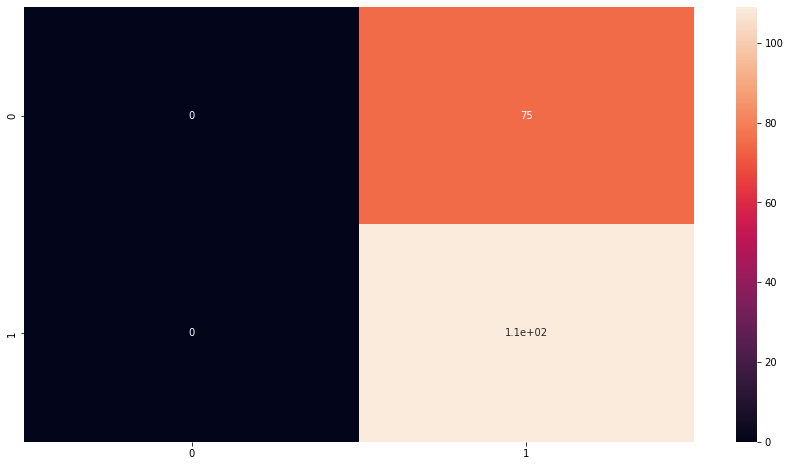

In [21]:
y_pred=clf.predict(x_test)
print(classification_report(y_test,y_pred))
confusion_mc = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(confusion_mc)
plt.figure(figsize=(15,8))
sea.heatmap(df_cm, annot=True)
plt.ylabe='True label'
plt.xlabel='Predicted label'

In [22]:
#when we make the gama so big it overfitting happened
#and when so small under fitting happened and we can say bias

In [23]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion='gini',max_depth=50,min_samples_split=0.01,min_samples_leaf=40).fit(x_train,y_train)
print('the score in training set:',clf.score(x_train,y_train))
print('the score in testing set:',clf.score(x_test,y_test))

the score in training set: 0.8106267029972752
the score in testing set: 0.7880434782608695


              precision    recall  f1-score   support

           0       0.72      0.77      0.75        75
           1       0.84      0.80      0.82       109

    accuracy                           0.79       184
   macro avg       0.78      0.79      0.78       184
weighted avg       0.79      0.79      0.79       184



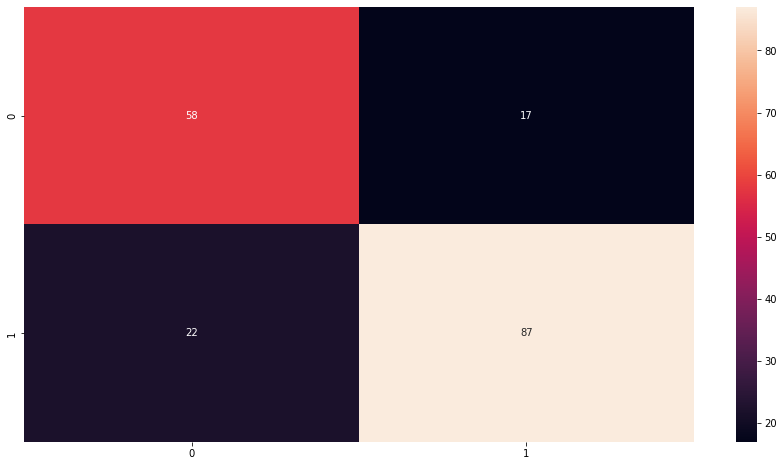

In [24]:
y_pred=clf.predict(x_test)
print(classification_report(y_test,y_pred))
confusion_mc = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(confusion_mc)
plt.figure(figsize=(15,8))
sea.heatmap(df_cm, annot=True)
plt.ylabe='True label'
plt.xlabel='Predicted label'


In [25]:
#close results to SVM

In [26]:
#random forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion='entropy',max_depth=100,min_samples_split=0.0001,
                             min_samples_leaf=100,n_estimators=200)
clf.fit(x_train,y_train)
print('the score in training set:',clf.score(x_train,y_train))
print('the score in testing set:',clf.score(x_test,y_test))

the score in training set: 0.8065395095367848
the score in testing set: 0.7989130434782609


              precision    recall  f1-score   support

           0       0.76      0.75      0.75        75
           1       0.83      0.83      0.83       109

    accuracy                           0.80       184
   macro avg       0.79      0.79      0.79       184
weighted avg       0.80      0.80      0.80       184



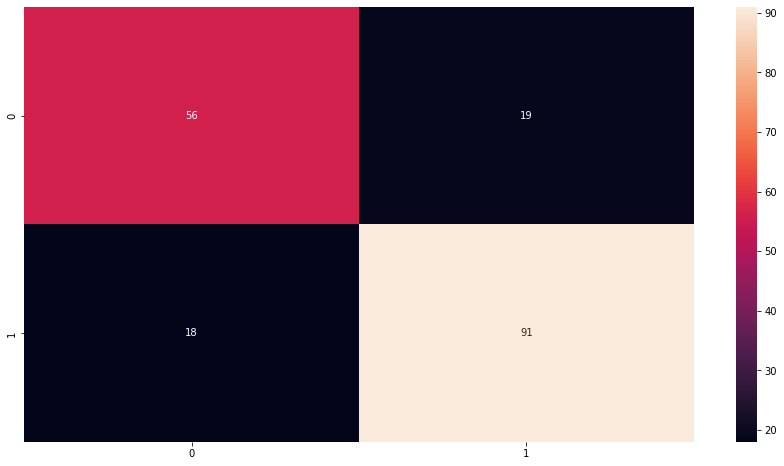

In [27]:
y_pred=clf.predict(x_test)
print(classification_report(y_test,y_pred))
confusion_mc = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(confusion_mc)
plt.figure(figsize=(15,8))
sea.heatmap(df_cm, annot=True)
plt.ylabe='True label'
plt.xlabel='Predicted label'

In [28]:
#Svm till now gives the best results

In [29]:
#instead of "from adspy_shared_utilities import plot_labelled_scatter" defining the function in the code
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn.tree import export_graphviz
import matplotlib.patches as mpatches
import numpy as np
def plot_labelled_scatter(X, y, class_labels):
    num_labels = len(class_labels)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    marker_array = ["o", "^", "*",".", ",", "#"]
    color_array = ['#FF0000', '#FFFF00', '#00FF00', '#00FFFF','#FF00FF','#0000FF']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(np.arange(0, num_labels + 1, 1), ncolors=num_labels)
    
    plt.figure(figsize=(10,10))
    plt.scatter(X[:, 0], X[:, 1], s=65, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.40, 
                edgecolor='black', lw = 1)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h)

    plt.show()

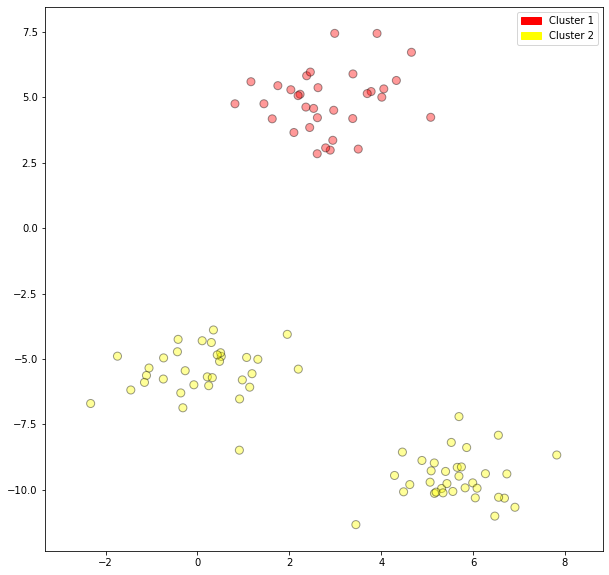

In [30]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

x, y = make_blobs(random_state = 10) 

from sklearn.preprocessing import MinMaxScaler
X_normalized = MinMaxScaler().fit(x).transform(x)

kmeans = KMeans(n_clusters = 2)
kmeans.fit(X_normalized)

plot_labelled_scatter(x, kmeans.labels_, ['Cluster 1', 'Cluster 2'])

In [31]:
#when choosing clusters number as 2
# it keep orgnizing them logically as 3 clusters
#here we cant be sure if there is a problem in the dataset or there is sth hidden we cant see

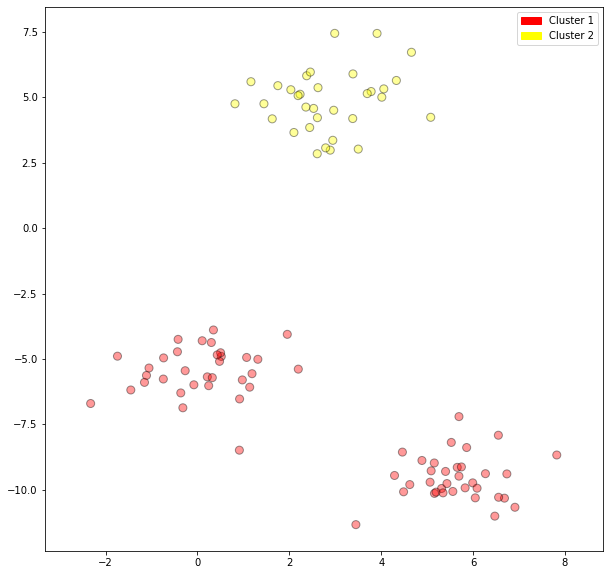

In [32]:
#Agglomerative
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

X, y = make_blobs(random_state = 10)

cls = AgglomerativeClustering(n_clusters = 2, linkage='ward')
cls_assignment = cls.fit_predict(X)

plot_labelled_scatter(X, cls_assignment, 
        ['Cluster 1', 'Cluster 2'])

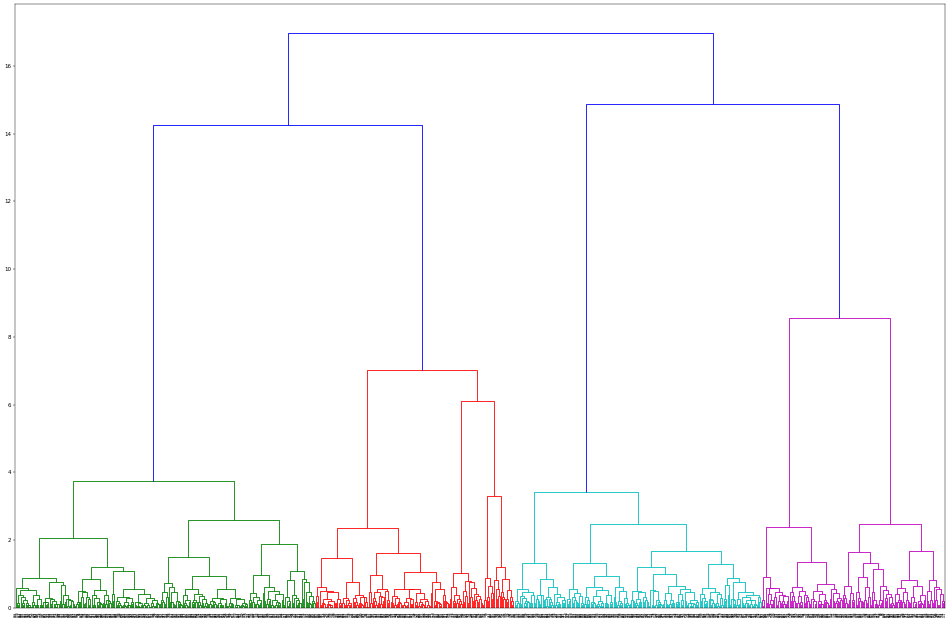

In [36]:
from scipy.cluster.hierarchy import ward, dendrogram
plt.figure(figsize=(30,20),dpi=40)
dendrogram(ward(x_train))
plt.show()